In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

irisData = pd.read_csv('irisData/iris_dataset.csv')

In [57]:
irisData.head()  

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [58]:
irisData.shape
irisData["species"].value_counts()
irisData.isnull().sum().sum() # sum of the sums, only one shows the missing sums for each category

irisData.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


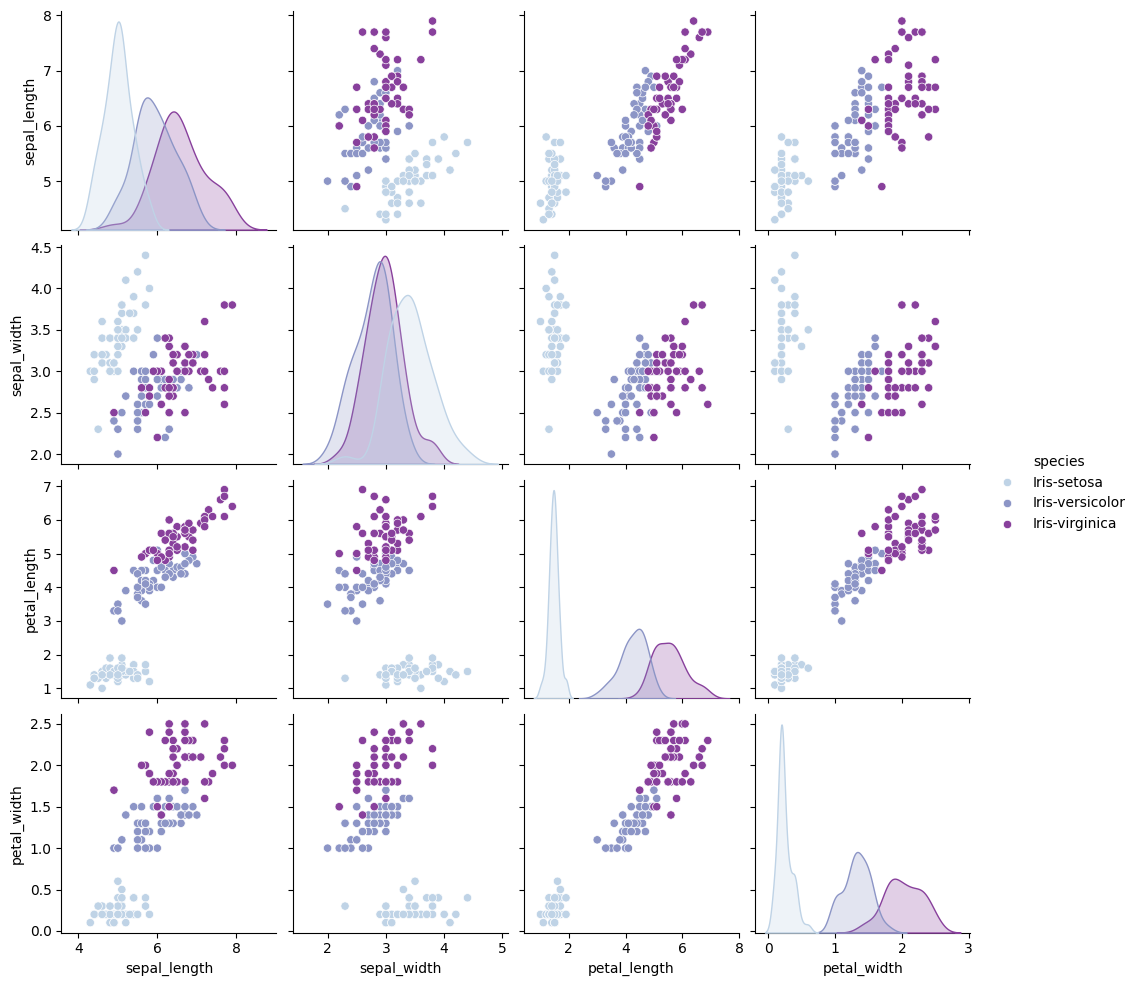

In [59]:
sns.pairplot(irisData, hue="species", palette="BuPu")

notes for me;
setosa has a high sepal width and a low sepal length; virginica has a low sepal width and a high sepal length; versicolor is typically somewhere in between the two

length goes from setosa --> versicolor --> virginica (shortest to longest)

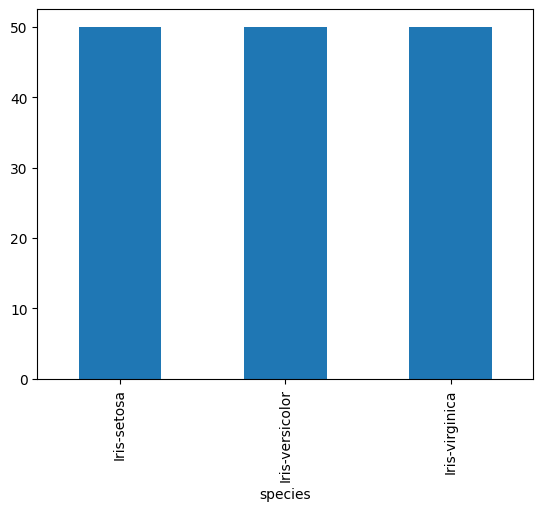

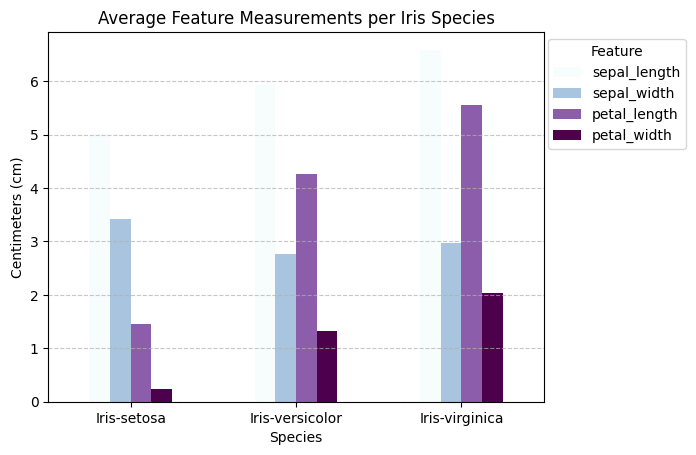

In [60]:
irisData['species'].value_counts().plot(kind='bar') # note; each species has 50 data points in this set

meanValues = irisData.groupby('species').mean()
meanValues.plot(kind='bar', cmap='BuPu')

plt.title('Average Feature Measurements per Iris Species')
plt.xlabel('Species')
plt.xticks(rotation=0)
plt.ylabel('Centimeters (cm)')
plt.legend(title='Feature', bbox_to_anchor=(1.3, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [61]:
# encoding because the class names aren't numbers :sweat:
irisData.sample(10)
irisEncoded = pd.get_dummies(irisData, columns=['species'], dtype=int)
irisEncoded.head()

,sepal_length,sepal_width,petal_length,petal_width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


note to self; using one hot encoding can be better than using label encoding to avoid bias!

last summer, i used label encoding for my machine learning project (yap session).. i wonder if that messed with the accuracy of the multiple linear regression model

In [62]:
feature_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
label_columns = ['species_Iris-setosa', 'species_Iris-versicolor', 'species_Iris-virginica']
x = irisEncoded[feature_columns].values
y = irisEncoded[label_columns].values

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42) #random state = the shuffling
scaler = StandardScaler() # standardization here vs using z score
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)

In [63]:
def createModel(learningRate=0.01): # wires the neural network
    model = keras.Sequential([
        keras.layers.Input(shape=(4,)), # four input descriptors tuple
        keras.layers.Dense(16, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2), # prevents overfitting
        keras.layers.Dense(8, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation='softmax') # three species options
    ])
    return model

note to self; it's more common to start with more neurons in earlier layers. relu = Rectified Linear Unit, which sets negative values to 0 and helps the model learn quickly without slowing anything down

also, drop-off randomly turns off 20% of neurons to fight against overfit
and softmax converts the output into 3 probability values that sum to 1

high probability = the models chosen species

In [64]:
learningRate = 0.01
model = createModel(learningRate) # creates a model via the neural network
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=learningRate), # adaptive moment estimation
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

earlyStopping = keras.callbacks.EarlyStopping( # stop training when loss stops improving for 10 rounds
    monitor = 'val_loss', patience = 10, restore_best_weights = True
)

#note; learning_rate and restore_best_weights are NOT user-made variables

In [65]:
history = model.fit(
    xTrain, yTrain,
    validation_data = (xTest, yTest),
    epochs = 50, # limit to 50 training rounds
    batch_size = 8, # model updates every 8 examples
    callbacks = [earlyStopping],
    verbose = 1
)

# note; validation_data, val_loss, and batch_size are NOT user-made variables

print("Training done!")

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.4462 - loss: 1.2740 - val_accuracy: 0.6333 - val_loss: 0.8582
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7552 - loss: 0.6587 - val_accuracy: 1.0000 - val_loss: 0.6183
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8904 - loss: 0.4364 - val_accuracy: 1.0000 - val_loss: 0.4378
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8076 - loss: 0.4976 - val_accuracy: 1.0000 - val_loss: 0.3307
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8611 - loss: 0.3247 - val_accuracy: 0.9667 - val_loss: 0.2613
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8580 - loss: 0.3492 - val_accuracy: 0.9667 - val_loss: 0.2275
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9246 - loss: 0.2830 - val_accuracy: 0.9667 - val_loss: 0.2215
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8731 - loss: 0.2849 - val_accuracy: 0.9667 - val

In [66]:
print("\nEvaluating on the test data...") # final model test
testLoss, testAcc = model.evaluate(xTest, yTest, verbose = 0)
print(f"Test Accuracy: {testAcc:.4f}")


Evaluating on the test data...
Test Accuracy: 1.0000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


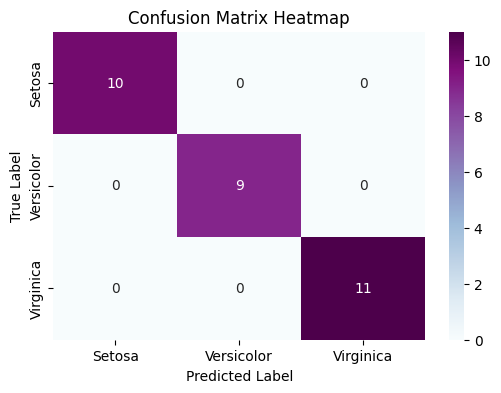

In [67]:
# adding a confusion matrix to see how the model did

yPredProbs = model.predict(xTest)
yPredClasses = np.argmax(yPredProbs, axis = 1)
yTrueClasses = np.argmax(yTest, axis = 1)

cm = confusion_matrix(yTrueClasses, yPredClasses)

print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu',
            xticklabels = ['Setosa', 'Versicolor', 'Virginica'],
            yticklabels = ['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

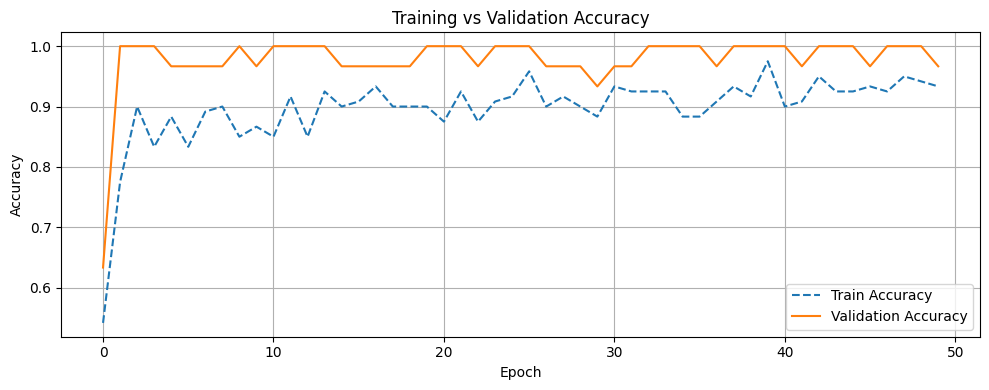

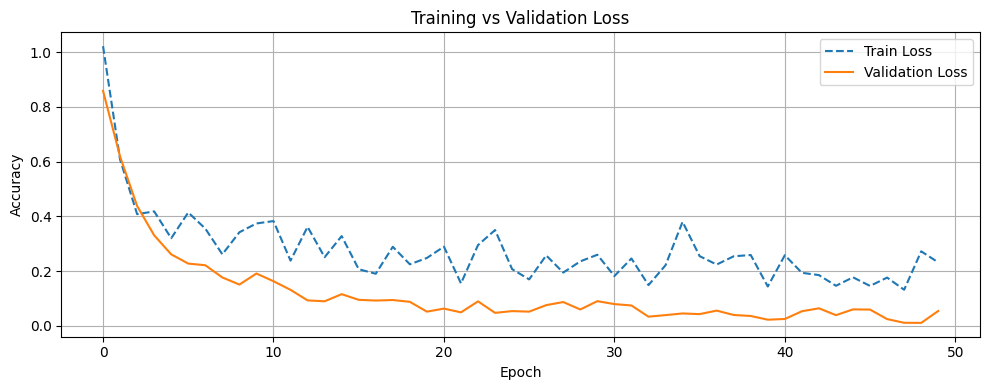

In [68]:
# graphs for accuracy and loss

# accuracy
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='Train Accuracy', linestyle='--')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# loss
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss', linestyle='--')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()